# Научная графика в Python

Автор: Шабанов Павел Александрович

E-mail: pa.shabanov@gmail.com

URL: [Заметки по программированию в науках о Земле](http://progeoru.blogspot.ru/)

Дата последнего обновления: 12.03.2017

In [1]:
# Преамбула
%matplotlib inline

import os
import matplotlib.pyplot as plt
from matplotlib import rcParams

import numpy as np

def save(name='', fmt='png'):
    pwd = os.getcwd()
    iPath = './pictures/{}'.format(fmt)
    if not os.path.exists(iPath):
        os.mkdir(iPath)
    os.chdir(iPath)
    plt.savefig('{}.{}'.format(name, fmt), fmt='png')
    os.chdir(pwd)
    #plt.close()

rcParams['font.family'] = 'fantasy'
rcParams['font.fantasy'] = 'Arial'

## Глава 6 Область рисования Axes

### Содержание главы

1. Контейнер Axes;

2. Создание областей рисования;

3. Круговые и прямоугольные области рисования;

4. Методы области рисования Axes.

Область рисования Axes - это центральный объект при создании научных графиков. Это тот объект, та область на которую наносятся координатные оси, линии графиков и столбцы диаграмм, легенды к ним и так далее. Взамен активного использования pyplot предлагается использовать более объектно-ориентированный подход для вызова графических команд и изменениях их свойств.

### Электронные ресурсы:

+ [Описание элементов рисунка в matplotlib](http://matplotlib.org/users/artists.html).

### 6.1 Контейнер Axes

Структурно область рисования Axes необходима как элемент более низкого иерархического уровня нежели Figure (весь рисунок), на котором непосредственно будут располагаться различные графические элементы. Axes похож на Frame в веб-дизайне, то есть это область, на которой можно размещать графические примитивы. При этом в matploltib непосредственно на Figure нельзя рисовать (изменение цвета фона не считается за полноценное рисование) и соответственно нужен хотя бы один экземпляр axes.

Область рисования Axes является второй "матрёшкой" (после Figure) или контейнером, на который можно наносить другие элементы рисунка (или контейнеры), в первую очередь координатные оси Axis. 

При создании области рисования создаётся экземпляр класса `matplotlib.axes._axes.Axes`. Этот класс является, пожалуй, центром вселенной matplotlib. Он включает большинство всех элементов рисунка Artists, которые используются при создании рисунка, а также большую часть вспомогательных методов для настройки этих методов. Также у данного класса есть родственный класс `matplotlib.axes._subplots.AxesSubplot`, который создаётся при создании мультиокон subplots. 

Список областей рисования после создания объекта fig [] 

Список областей рисования после вызова комманды scatter [<matplotlib.axes._subplots.AxesSubplot object at 0x0000000003FB0908>] 



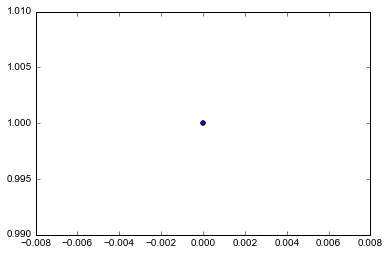

In [2]:
# Пример 6.1.1

import matplotlib.pyplot as plt

fig = plt.figure()

print (u'Список областей рисования после создания объекта fig %s \n' % fig.axes)

plt.scatter(0.,1.)

print (u'Список областей рисования после вызова комманды scatter %s \n' % fig.axes)
    
save('pic_6_1_1', fmt='png')
save('pic_6_1_1', fmt='pdf')
    
plt.show()

После создания экземпляра fig типа Figure список областей рисования fig.axes пуст. Но стоит вызвать любую графическую команду, создающую графический примитв, и в нём появляется экземпляр типа AxesSubplot. Таким образом, при работе с интерфейсом pyplot область рисования создаётся неявно, но она существует и именно на ней располагаются многие графические элементы (линии, текст и т.д.).

Чтобы лучше понять сущность Axes как контейнера/хранилища графических примитивов (или других контейнеров подчинённого уровня), рассмотрим что происходит с экземпляром области рисования при вызове графической команды.

Lines on the axes: <type 'list'> [<matplotlib.lines.Line2D object at 0x000000000A55C2B0>]
Patches on the axes: 50 <a list of 50 Patch objects>


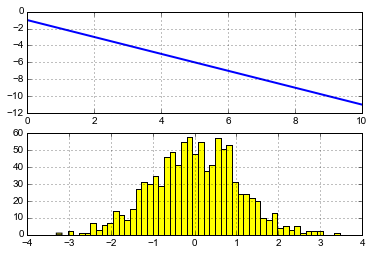

In [3]:
# Пример 6.1.2

import matplotlib.pyplot as plt
import numpy as np

x = [0,1,2,3,4,5,6,7,8,9,10]
y = [-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,-11]

fig = plt.figure()

# Первая область рисования (мультиокно 1)
ax = fig.add_subplot(211)
line = ax.plot(x, y, '-', color='blue', linewidth=2)
print 'Lines on the axes:', type(line), line

# Вторая область рисования (мультиокно 2)
ax2 = fig.add_subplot(212)
n, bins, rectangles = ax2.hist(np.random.randn(1000), 50, facecolor='yellow')
print 'Patches on the axes:', len(ax2.patches), rectangles

for ax in fig.axes:
    ax.grid(True)

save('pic_6_1_2', fmt='png')
save('pic_6_1_2', fmt='pdf')

plt.show()

При вызове метода `ax.plot()` создаётся экземпляр `matplotlib.lines.Line2D()`, эта линия обновляется по всем свойствам Line2D, которые были переданы в виде ключевых слов (keyword arguments), добавляется в контейнер Axes.lines и возвращается пользователю в виде списка линий. Методы, которые создают геометрические фигуры patches (например, `plt.bar()` создаёт ряд прямоугольников rectangles), добавляют patches в список Axes.patches.

### 6.2 Создание областей рисования

Чтобы создать область рисования типа Axes или AxesSubplot, существует ряд способов (подробнее смотри в следующей главе). Одним из стандартных способов создания области рисования является метод `fig.add_axes()` экземпляра fig объекта Figure. В качестве обязательного параметра rect метод просит указать последовательность из координат начальной точки (x, y), а также ширины и высоты от неё до другого угла прямоугольника (в случае круговой области рисования - смотри главу "Графики в полярных координатах"). Значения должны быть выражены в относительных единицах от 0 до 1 включительно. 

Весь рисунок Figure по сути имеет начальную точку (0., 0.) и ширину/высоту (1., 1.). Поэтому относительно определения границ области рисования стоит помнить следующее: подписям координатных осей (axis labels), заголовкам (titles) и подписям делений координатных осей (tick labels) нужно место. Определив размер области рисования вплотную к границам рисунка и передав в качестве аргумента список [0, 0, 1, 1], можно столкнуться с ситуацией, когда подписи вылезли за пределы рисунка, и при сохранении рисунок окажется обрезанным. Это не всегда очевидно при работе в среде ipython, ipython notebook, поэтому лучше проверять результат рисования перед запуском поточного производства графиков.

Тип ax: <class 'matplotlib.axes._axes.Axes'>


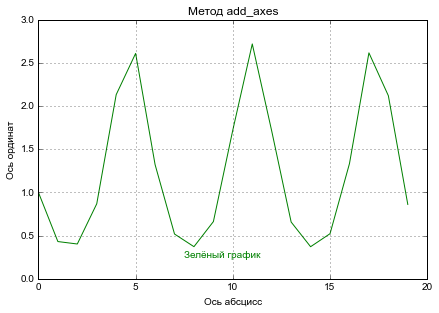

In [4]:
# Пример 6.2.1

import matplotlib.pyplot as plt

fig = plt.figure()

x = np.arange(20)
y = np.exp(-np.sin(x))

x0 = 0.05
y0 = 0.05
dx = 0.9
dy = 0.9

rect = [x0, y0, dx, dy]
ax = fig.add_axes(rect)

ax.plot(x, y, 'g')
ax.text(7.5, 0.25, u'Зелёный график', color='g')
ax.grid(True)

# В отличие от интерфейса pyplot, команды для назначения подписей 
# нужно употреблять с приставкой set_

ax.set_title(u'Метод add_axes')
ax.set_xlabel(u'Ось абсцисс')
ax.set_ylabel(u'Ось ординат')

print ('Тип ax: %s' % type(ax))

save('pic_6_2_1', fmt='png')
save('pic_6_2_1', fmt='pdf')

plt.show()

Также можно создавать области рисования с помощью метода `fig.add_subplot()`, который позволяет создавать мультиокона (subplots) или мультиоконные рисунки. Создаваемая таким способом область рисования имеет другой, но родственный, класс - AxesSubplot. В качестве обязательного параметра subplot просит указать триплет (набор из 3 цифр), который определяет место области на рисунки. Подробнее о subplot будет рассказно в следующей главе. Для создания одной области рисования типа AxesSubplot или просто subplot, триплет равен 111.

Тип ax: <class 'matplotlib.axes._subplots.AxesSubplot'>


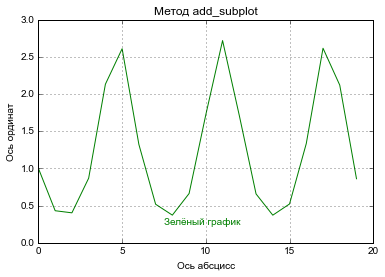

In [5]:
# Пример 6.2.2

fig = plt.figure()

x = np.arange(20)
y = np.exp(-np.sin(x))

ax = fig.add_subplot(111)
ax.plot(x, y, 'g')
ax.text(7.5, 0.25, u'Зелёный график', color='g')
ax.grid(True)

# В отличие от интерфейса pyplot, команды для назначения подписей 
# нужно употреблять с приставкой set_

ax.set_title(u'Метод add_subplot')
ax.set_xlabel(u'Ось абсцисс')
ax.set_ylabel(u'Ось ординат')

print ('Тип ax: %s' % type(ax))

save('pic_6_2_2', fmt='png')
save('pic_6_2_2', fmt='pdf')

plt.show()

Ничто не мешает комбинировать методы `add_subplot` и `add_axes` на одном рисунке Figure. Стоит, однако, помнить, что размещая явно область рисования методом `fig.add_axes()`, можно перекрыть другие созданные области рисования. Иногда это оказывается полезным (создание "окна в окне"), а иногда это может привести к неприятному эффекту.


**Правила хорошего кода**

> В дальнейшем мы всегда будем соблюдать следующие правила при создании научной графики:

> **1. Явно создавать экземпляр Figure:**

> `import matplotlib.pyplot as plt`

> `fig = plt.figure()`

> **2. Создавать хотя бы одну область рисования Axes:**

> `ax = fig.add_subplot(111)`

> или

> `ax = fig.add_axes[0.05, 0.05, 0.9, 0.9]`

> **3. Интерфейс pyplot далее мы будем использовать редко, за исключением следующих случаев:**

> + `plt.figure()`

> + `plt.tight_layout()`

> + `plt.show()`

Считается хорошим тоном не использовать неявный импорт типа "`from matplotlib.pyplot import *`" или "`from pylab import *"`. Лучше использовать явный импорт: "`from matplotlib import rcParams as rc`". Также при создании достаточно сложных рисунков не стоит использовать интерфейс pyplot. Он хорош для ознакомления и быстрой визуализации черновиков. Но для создания high quality plots, которые требуются для полиграфии и при публикациях в научных журналах, лучше использовать методы axes, а не pyplot. 

### 6.3 Круговые и прямоугольные области рисования

Как и Figure, область рисования Axes имеет атрибут patch, который является прямоугольным (Rectangle) для декартовой системы координат и круговым (Circle) для полярной системы координат. Этот patch определяет форму, фон и границы создаваемой области рисования. Подробнее о графиках в полярных координатах и областях рисования в полярных координатах показано в соответствующей главе.

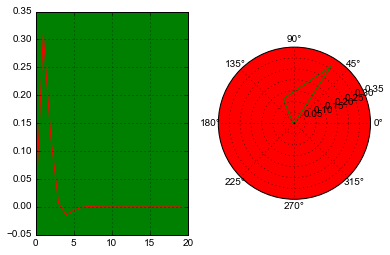

In [6]:
# Пример 6.3

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(20)
y = np.exp(-x)*np.sin(x)

fig = plt.figure()

# Обычный график в декартовых координатах
ax = fig.add_subplot(121, polar=False)
ax.plot(x, y, 'r')
rect = ax.patch 
rect.set_facecolor('green')
ax.grid(True)

# График в полярных координатах
ax2 = fig.add_subplot(122, polar=True)
ax2.plot(x, y, 'g')
rect = ax2.patch  # Круговой
rect.set_facecolor('red')

save('pic_6_3', fmt='png')
save('pic_6_3', fmt='pdf')

plt.show()

### 6.4 Методы области рисования Axes

Все графические команды, применимые для интерфейса pyplot, применимы и для Axes. Разница заключается лишь в том, что вызывать их нужно не от plt (matplotlib.pyplot), а от экземпляра типа Axes или AxesSubplot. 

C методами настройки посложнее: почти все функции имеют аналоги, но бывают синтаксические различия. Например, чтобы сделать подпись оси ординат в интерфейсе pyplot мы использовали метод `plt.ylabel()`. Для экземпляра области рисования ax подобный метод вызывается через метод `ax.set_xlabel()`. 

**SET & GET**

Вообще говоря, в matplotlib при работе с различными свойствами элементов рисунка поддерживается система "set-get". Её суть состоит в том, что если нужно получить текущее значение атрибута или свойства объекта, то нужно вызвать его с помощью соответствующей команды-функции с приставкой "get_". Например, чтобы получить список, состоящий из положений главных делений на оси абсцисс из области рисования ax, то нужно указать

> `current_xticks = ax.get_xticks()`

А чтобы изменить этот список на пользовательский, нужно вызвать аналогичную команду, но с приставкой "set_". В случае с делениями оси абсцисс это выглядит так:

> `new_xticks = ax.set_xticks(custom_xticks)`

Существует множество вспомогательных методов Axes для создания и изменения свойств элементов рисунков и графических примитивов, то есть множество графических команд. Всё, что доступно для pyplot, доступно и для axes-экземпляров. Далее приводятся некоторые из них:

----------------------------------------------------------

Вспомогательный метод -> Описание -> Artist -> Контейнер

----------------------------------------------------------

1. ax.annotate -> текстовая подпись -> Annotate	-> ax.texts

2. ax.text -> текст -> Text -> ax.texts

3. ax.bar -> столбчатая диаграмма -> Rectangle -> ax.patches

4. ax.errorbar -> график погрешностей -> Line2D и Rectangle -> ax.lines и ax.patches

5. ax.fill -> заливка области -> Polygon -> ax.patches

6. ax.hist -> гистограмма -> Rectangle -> ax.patches

7. ax.imshow -> изображение -> AxesImage -> ax.images

8. ax.legend -> легенда -> Legend -> ax.legends

9. ax.plot -> XY график -> Line2D -> ax.lines

10. ax.scatter -> точечная диаграмма -> PolygonCollection -> ax.collections

----------------------------------------------------------

Lines: <type 'list'> [<matplotlib.lines.Line2D object at 0x000000000BDD76A0>]
Patches: 50 <a list of 50 Patch objects>


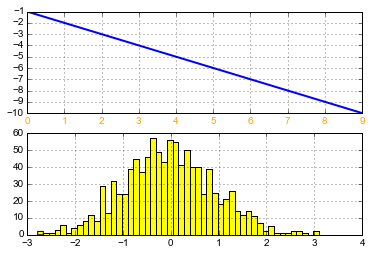

In [7]:
# Пример 6.4.1

x = np.arange(10)
y = np.arange(-1, -11, -1)

fig = plt.figure()

ax = fig.add_subplot(211)
line = ax.plot(x, y, '-', color='blue', linewidth=2)
print 'Lines:', type(line), line

# Изменяем цвет подписей делений оси OX с помощью "set-get" технологии
for label in ax.get_xticklabels():
    label.set_color('orange')

ax2 = fig.add_subplot(212)
n, bins, rectangles = ax2.hist(np.random.randn(1000), bins=50, facecolor='yellow')
print 'Patches:', len(ax2.patches), rectangles

for ax in fig.axes:
    ax.grid(True)

save('pic_6_4_1', fmt='png')
save('pic_6_4_1', fmt='pdf')

plt.show()

При создании того или иного графического объекта на текущей области рисования он добавляется в соответствующий его типу контейнер. Ниже представлен краткий список таких Artists-контейнеров, которые есть у Axes. 

----------------------------------------------------------

Axes атрибут - Описание

----------------------------------------------------------

1. patch - экземпляр Rectangle для фона (background) Axes;

2. artists - список экземпляров Artist;

3. collections - список экземпляров Collection;

4. images - список экземпляров AxesImage;

5. legends - список экземпляров Legend;

6. lines - список экземпляров Line2D;

7. patches - список экземпляров Patch;

8. texts - список экземпляров Text;

9. xaxis - экземпляр matplotlib.axis.XAxis;

10. yaxis - экземпляр matplotlib.axis.YAxis.

------------------------------------------------------

XAxis и YAxis являются очень важными Artist-контейнерами. Через обращение к ним можно изменять свойства отрисовки делений (ticks) и подписей (labels) координатных осей. Например, с их помощью можно изменить размер шрифта подписей делений оси абсцисс XAxis с помощью вспомогательных методов Axes. Подробнее о работе с контейнерами XAxis и YAxis будет рассказано в главе "Координатные оси".

Lines: <type 'list'> [<matplotlib.lines.Line2D object at 0x000000000A3A8D68>]
Patches: 50 <a list of 50 Patch objects>


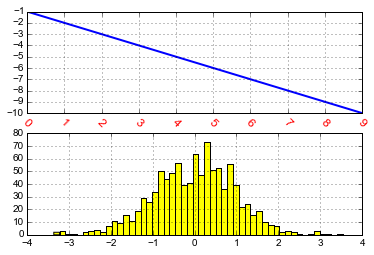

In [8]:
# Пример 6.4.2

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(10)
y = np.arange(-1, -11, -1)

fig = plt.figure()

ax = fig.add_subplot(211)
line = ax.plot(x, y, '-', color='blue', linewidth=2)
print 'Lines:', type(line), line

# Изменяем цвет подписей делений оси OX с помощью работы с контейнером XAxis
for label in ax.xaxis.get_ticklabels():
    label.set_color('red')
    label.set_rotation(-45)
    label.set_fontsize(12)

ax2 = fig.add_subplot(212)
n, bins, rectangles = ax2.hist(np.random.randn(1000), bins=50, facecolor='yellow')
print 'Patches:', len(ax2.patches), rectangles

for axes in fig.axes:
    axes.grid(True)

save('pic_6_4_2', fmt='png')
save('pic_6_4_2', fmt='pdf')

plt.show()

В настройках matplotlib у области рисования Axes имеется несколько атрибутов, которые заданы по умолчанию. Именно эти параметры определяют свойства графических элементов (цвет линии, наличие вспомогательной сетки grid, цвет и размер шрифта подписей координатных осей) для каждого вновь созданного тем или иным способом экземпляра Axes.

----------------------------------------------------------

1. u'axes.edgecolor': u'k'

2. u'axes.facecolor': (1, 1, 1, 0)

3. u'axes.formatter.limits': [-7, 7]

4. u'axes.formatter.use_locale': False

5. u'axes.formatter.use_mathtext': False

6. u'axes.formatter.useoffset': True

7. u'axes.grid': False

8. u'axes.grid.which': u'major'

9. u'axes.hold': True

10. u'axes.labelcolor': u'k'

11. u'axes.labelsize': u'medium'

12. u'axes.labelweight': u'normal'

13. u'axes.linewidth': 1.0

14. u'axes.titlesize': u'large'

15. u'axes.titleweight': u'normal'

16. u'axes.unicode_minus': True

17. u'axes.xmargin': 0.0

18. u'axes.ymargin': 0.0

----------------------------------------------------------

Изменяя значения их непосредственно в файле matplotlibrc или по ходу программы с помощью rcParams, можно добиться пользовательской настройки шрифтов, цвета и других параметров области рисования axes. Описанные выше свойства применяются ко всем вновь созданным экземплярам типа Axes. Очевидно, что разные области рисования могут иметь разные параметры в рамках одного рисунка.

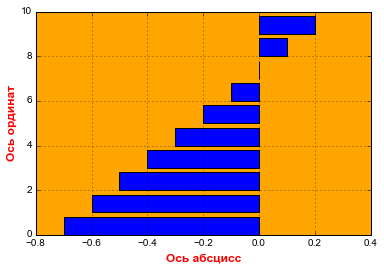

In [9]:
# Пример 6.4.3

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = 'orange'
rcParams['axes.labelcolor'] = 'red'
rcParams['axes.labelsize'] = 'large'
rcParams['axes.labelweight'] = 'bold'

k = 0.1
b = -0.7

x = np.arange(10)
y = k*x + b

fig = plt.figure()

ax = fig.add_subplot(111)
ax.barh(x, y)
ax.set_xlabel(u'Ось абсцисс')
ax.set_ylabel(u'Ось ординат')
ax.grid(True)

save('pic_6_4_3', fmt='png')
save('pic_6_4_3', fmt='pdf')

plt.show()

Автор: Шабанов Павел Александрович

E-mail: pa.shabanov@gmail.com

## Научная графика в Python

### Оглавление

+ [Глава 1 Библиотека matplotlib. Pyplot](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 1 Pyplot.ipynb)

+ [Глава 2 Основные графические команды](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 2 Main graphical commands.ipynb)

+ [Глава 3 Работа с текстом и шрифтами](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 3 Text and Fonts.ipynb)

+ [Глава 4 Цвет и цветовая палитра](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 4 Color.ipynb)

**Часть II Структура рисунка в matplotlib**

+ [Глава 5 Рисунок](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 5 Figure container.ipynb)

> + [Глава 6 Область рисования](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 6 Axes container.ipynb)

+ [Глава 7 Мультиоконные рисунки](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 7 Subplots.ipynb)

+ [Глава 8 Координатные оси](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 8 Axis container.ipynb)

+ [Глава 9 Деления координатных осей](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 9 Ticks container.ipynb)

**Часть III Специальные элементы рисунка в matplotlib**

+ [Глава 10 Особенности координатных осей](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 10 Twinx and log scale.ipynb)

+ [Глава 11 Графики в полярной системе координат](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 11 Polar plots.ipynb) 

+ [Глава 12 Легенда](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 12 Legends.ipynb)

+ [Глава 13 Цветовая шкала](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 13 Colorbar.ipynb)